# # Homework 2

COMS W4995-Topics in Computer Science: Machine Learning with Applications in Finance

Instructor: Germán G. Creamer 

Minyue Liu ml4368

***

Predictive modeling: targeting offers

You have to build a predictive model for targeting offers to consumers, and conduct some model performance analytics on the result.

A financial company keeps records on individuals who had been previously targeted with a direct marketing offer for an identity theft protection (risk management) subscription including their household income, the average amount sold, the frequency of their transactions, and whether or not they bought a subscription in the most recent campaign. This company would like to use data mining techniques to build customer profile models. 

We will use historical data on past customer responses (contained in the file directMarketing.csv) in order to build a classification model. The model can then be applied to a new set of prospective customers whom the organization may contact in a direct marketing campaign. 

Using python and the package scikit-learn (http://scikit-learn.org/stable/documentation.html) build predictive models using CART (decision trees), support vector machine, and logistic regression to evaluate whether or not the customer will buy a subscription in this campaign. You may need to pre-process the data. Logistic regression becomes the benchmark that you will use to compare the rest of algorithms.

You must randomly split your data set using 70% and 30% of the observations for the training and test data set respectively. 

1) Compare the different models explored using the test error rate (percent incorrectly classified), the area under the ROC curve and the confusion matrix against the benchmark (logistic regression).

2) Use matplotlib to plot the ROC and the precision-recall curves for your models. Discuss and compare the performance of each model according to these curves against the benchmark (logistic regression).

confusion matrix:
```
  |____________ p ______________|___________ n _______________|
Y | 1's predicted to be 1's(TP) | 1's predicted to be 0's(FN) |
N | 0's predicted to be 1's (FP)| 0's predicted to be 0's(TN) |
```

In [2]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import matplotlib.pyplot as pot
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [3]:
# Load data
path = "./directMarketing.csv"
df = pd.read_csv(path)[["income","firstDate","lastDate","amount","freqSales","saleSizeCode","starCustomer","lastSale","avrSale","class"]].dropna()
# Transform starCustomer column to a numeric variable
df["starCustomers"] = (df.starCustomer == "X").astype(int)
df = df.drop("starCustomer", axis="columns")##delete the original starCustomer column
# Transform saleSizeCode column to a numeric variable
df["saleSizeCodes"] = df.saleSizeCode.replace(["D","E","F","G"],[1,2,3,4])
df = df.drop("saleSizeCode", axis="columns")##delete the original saleSizeCode column
print(df["saleSizeCodes"].value_counts())
# Take a look at the data
df.head(5)
df.shape

3    4666
2    2622
4    1778
1    1108
Name: saleSizeCodes, dtype: int64


(10174, 10)

In [4]:
class_new = df['class']
df.drop(labels=['class'], axis=1,inplace = True)
df["class"] = class_new
df.head(5)

,income,firstDate,lastDate,amount,freqSales,lastSale,avrSale,starCustomers,saleSizeCodes,class
0,3,9409,9509,0.06,1,50,30.00,0,4,0
1,2,9201,9602,0.16,4,20,20.55,1,4,1
2,0,9510,9603,0.20,4,5,8.75,0,2,0
3,6,9409,9603,0.13,2,25,22.50,0,4,0
4,0,9310,9511,0.10,1,25,12.50,0,4,0


Index(['income', 'firstDate', 'lastDate', 'amount', 'freqSales', 'lastSale',
       'avrSale', 'starCustomers', 'saleSizeCodes'],
      dtype='object')


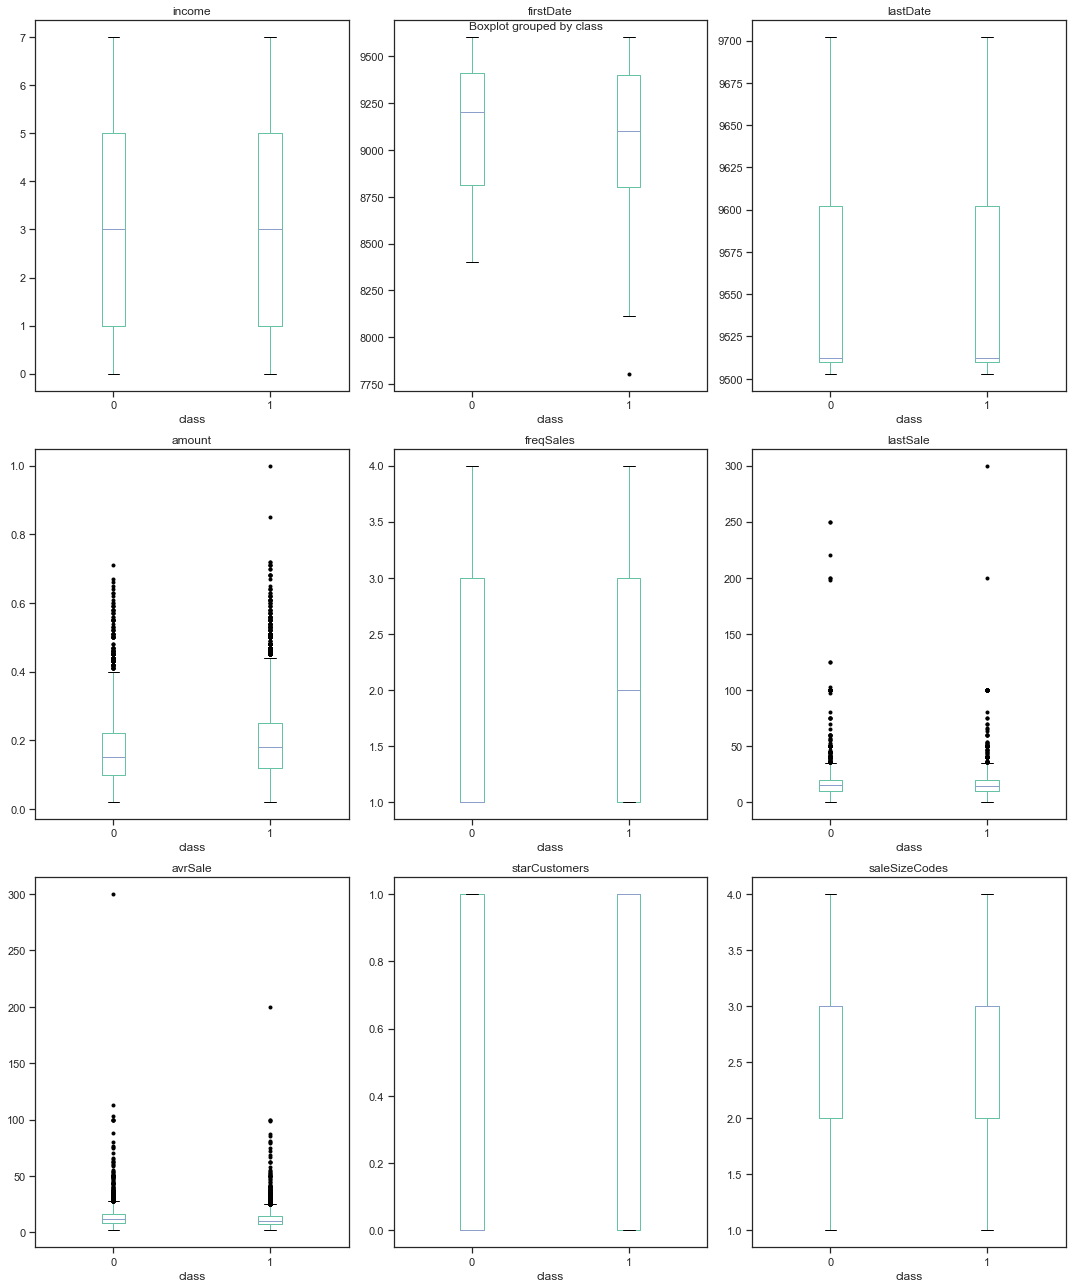

In [5]:
predictor_columns = df.columns[:-1]
print(predictor_columns)
rows = 3
cols = 3
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(5*cols, 6*rows))
axs = axs.flatten()
for i in range(len(predictor_columns)):
        df.boxplot(predictor_columns[i], by="class", grid=False, ax=axs[i], sym='k.')
plt.tight_layout()

There's no single feature that can separate the data perfectly. Here I use all the rest of features to predict the class.

In [6]:
#split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(df[predictor_columns], df["class"], test_size=.3)
print(X_test.shape)

(3053, 9)


### 1. The decision tree model

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

## decision tree
depths = [1,2,3,4,5,6,7,8,9,10]
acc_max = 0
acclist = []
for i in depths:
    depth = i 
    # Plot
    decision_tree = DecisionTreeClassifier(max_depth=depth, criterion="entropy")
    decision_tree.fit(X_train, Y_train)
    acc = metrics.accuracy_score(decision_tree.predict(X_test), Y_test)
    if acc > acc_max:
        acc_max = acc
        depth_max = i
        ##confusion matrix for dt
        y_test = Y_test
        y_pred = decision_tree.predict(X_test)
        y_predpro = decision_tree.predict_proba(X_test)
        # print(y_test)
        # print(y_pred)
        
        
    acclist.append(acc)
    



##test error rate
# print("the idea depth is %s and the Accuracy is %.3f" % (depth_max,acclist[depth_max-1]))

dt_error_rate = 1 - acclist[depth_max-1]
print("The test error rate is %.3f" % dt_error_rate)


## the auc (the area under the ROC curve) for svm
auc_score = roc_auc_score(y_test,y_predpro[:,1])
print("AUC for dt: ",auc_score)


##confusion matrix for dt

confusion_matrix_dt = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
confusion_matrix_dt.head(2)



The test error rate is 0.423
AUC for dt:  0.596371801299397


,p,n
Y,783,570
N,721,979


### 2. The logistic regression model

In [26]:
##logisticregression
from sklearn import linear_model
import warnings
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')
lin_model = linear_model.LogisticRegression()

lin_model.fit(X_train, Y_train)
# print ("Accuracy = %.3f" % (metrics.accuracy_score(lin_model.predict(X_test), Y_test)))

y_predpro1 = lin_model.predict_proba(X_test)
# print("prob of y_pred",y_predpro1)
# print(y_pred)

acc = metrics.accuracy_score(lin_model.predict(X_test), Y_test)
lin_error_rate = 1 - acc
print("The test error rate is %.3f" % lin_error_rate)


##confusion matrix for logistic regression
y_test1 = Y_test
y_pred1 = lin_model.predict(X_test)
# print(y_test)
# print(y_pred)

## the auc (the area under the ROC curve) for logistic regression
auc_score1 = roc_auc_score(y_test1,y_predpro1[:,1])
print("AUC for logistic regression: ",auc_score1)

##confusion matrix
confusion_matrix_lg = pd.DataFrame(metrics.confusion_matrix(y_test1, y_pred1, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
confusion_matrix_lg.head(2)


The test error rate is 0.416
AUC for logistic regression:  0.6106571415326292


,p,n
Y,863,628
N,641,921


### 3. The SVM model

In [27]:
##svm
from sklearn.model_selection import cross_val_score
from sklearn import svm
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')
clf = svm.SVC(probability=True)
clf.fit(X_train, Y_train)
# print ("Accuracy = %.3f" % (metrics.accuracy_score(clf.predict(X_test), Y_test)))

acc = metrics.accuracy_score(clf.predict(X_test), Y_test)
svm_error_rate = 1 - acc
print("The test error rate is %.3f" % svm_error_rate)

y_predpro2 = clf.predict_proba(X_test)
# print("prob of y_pred",y_predpro2)



##confusion matrix for svm
y_test2 = Y_test
y_pred2 = clf.predict(X_test)
# print(y_test)
# print(y_pred)

## the auc (the area under the ROC curve) for svm

auc_score2 = roc_auc_score(y_test2,y_predpro2[:,1])
print("AUC for SVM : ", auc_score2)

##confusion matrix
confusion_matrix_svm = pd.DataFrame(metrics.confusion_matrix(y_test2, y_pred2, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
confusion_matrix_svm.head(2)


The test error rate is 0.466
AUC for SVM :  0.5448200108512012


,p,n
Y,820,739
N,684,810


### Compare the different models above

In [28]:
cols = ["test error rate", "auc"]
res = [[dt_error_rate,auc_score],[lin_error_rate,auc_score1],[svm_error_rate,auc_score2]]
index = ["dt","lg","svm"]
ans = pd.DataFrame(res,index,cols)
ans.head(3)

,test error rate,auc
dt,0.422863,0.596372
lg,0.415657,0.610657
svm,0.466099,0.544820


In [29]:
print("Decision tree confusion matrix")
print(confusion_matrix_dt)
print("Logistic regression confusion matrix")
print(confusion_matrix_lg)
print("Svm confusion matrix")
print(confusion_matrix_svm)

Decision tree confusion matrix
     p    n
Y  783  570
N  721  979
Logistic regression confusion matrix
     p    n
Y  863  628
N  641  921
Svm confusion matrix
     p    n
Y  820  739
N  684  810


I used the three different models namely, decision tree, logistic regression and support vector machine to predict the class based on the same training and testing dataset. According to the above results, as for test error rate, logistic regression has the best test error rate which is 0.415657 while the decision tree with the test error rate 0.422863 behaves better than the svm. The area under the ROC curve shows that given a positive sample and a negative sample, the probability of the model to assign a larger score to this positive sample. Hence we know that the larger the auc score is, the better the model is. In this case, logistic regression is the best with the auc 0.61 while the svm is the worst one with auc 0.54. But all of them are better than random guessing which is auc = 0.5. With the confusion matrix, the Yp and Nn show that the correct classification. The logistic regression correctly predict the largest numebr of the test data.

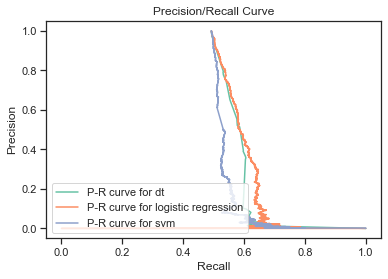

In [23]:
from sklearn.metrics import precision_recall_curve

def get_pr(test,predpro):
    true = test
    scores = predpro[:,1]
    precision, recall, thresholds = precision_recall_curve(true, scores)
    return precision, recall, thresholds


plt.figure(1) 
plt.title('Precision/Recall Curve')# give plot a title
plt.xlabel('Recall')# make axis labels
plt.ylabel('Precision') 

precision, recall, thresholds = get_pr(y_test, y_predpro)
plt.figure(1)
plt.plot(precision, recall,label = "P-R curve for dt")


precision1, recall1, thresholds1 = get_pr(y_test1, y_predpro1)
plt.figure(1)
plt.plot(precision1, recall1,label = "P-R curve for logistic regression")


precision2, recall2, thresholds2 = get_pr(y_test2, y_predpro2)

plt.plot(precision2, recall2,label = "P-R curve for svm")



plt.legend()
plt.show()

Precision shows that the ratio of true 1's over all predicted 1's. The recall shows the the ratio of predicted 1's over all true 1's. It more reach to the top right corner when the model behaves better. Logistic regression behaves best among the three while the svm behaves the worst.

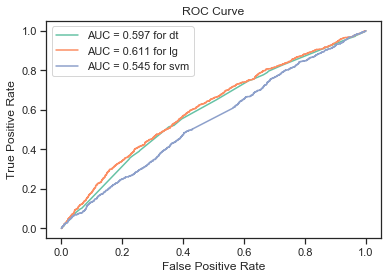

In [24]:
##plot the roc
def get_roc(y_test,y_predpro):
    fpr, tpr, threshold_roc = metrics.roc_curve(y_test, y_predpro[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    return fpr,tpr,roc_auc
    

fpr,tpr,roc_auc = get_roc(y_test,y_predpro)
fpr1,tpr1,roc_auc1 = get_roc(y_test1,y_predpro1)
fpr2,tpr2,roc_auc2 = get_roc(y_test2,y_predpro2)

plt.plot(fpr, tpr, label = 'AUC = %0.3f for dt' % roc_auc)
plt.plot(fpr1, tpr1, label = 'AUC = %0.3f for lg' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'AUC = %0.3f for svm' % roc_auc2)



plt.title('ROC Curve')# give plot a title
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In the ROC curve, it shows that whether a model has a good ability to do the prediciton. True positice means that the number of predicted 1's among true 1's while the false positive means that the number of predicted 1's among true 0's. y=x is the line showing random guessing. In the above chart, all models behave better than random guessing. When the curve reaches the top left corner, it indicates that the model has a good ability since the tpr is 1 while the fpr goes to 0. Logistic regression behaves the best among them and the decision tree behaves almost the same but slightly worse than logistic regression while the svm behaves the worst.